In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Smarket.csv into a Dataframe named stocks
google = pd.read_csv('Data/google.csv', na_values="NaN").dropna()

# print the information of the dataset
###     print(stocks.info())

# print # of rows, # of columns
#print(google.shape)

# print the first row
###     print(stocks.loc[0])

# print the first five rows
# print(google.head())


In [ ]:
# - Installs : Remove + and ,

google['Installs'] = google['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: int(x))


In [ ]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3
#df['Size'] = df['Size'].fillna(0)

google['Size'] = google['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

google['Size'] = google['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


google['Size'] = google['Size'].apply(lambda x: float(x))
google['Installs'] = google['Installs'].apply(lambda x: float(x))

google['Price'] = google['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google['Price'] = google['Price'].apply(lambda x: float(x))

google['Reviews'] = google['Reviews'].apply(lambda x: int(x))
#df['Reviews'] = df['Reviews'].apply(lambda x: 'NaN' if int(x) == 0 else int(x))
#print(df.loc[df.Size == 0.713]) #index = 3384
#df.loc[df.col1 == '']['col2']

# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

In [ ]:
def partion(x):
    if x < 4:
        return 0
    return 1

In [ ]:
google['Rating_Score'] = google['Rating'].map(partion)

google.head()

In [ ]:
# convert Direction to dummy variables

#google_type = pd.get_dummies(google['Type'])

# Join the dummy variables to the main dataframe
#google_new = pd.concat([google, google_type], axis=1)
#google_new.head()


In [ ]:
print(google["Type"].unique())

In [ ]:
google.loc[google["Type"] == "Free", "Type"] = 0
google.loc[google["Type"] == "Paid", "Type"] = 1

google_new = pd.concat([google], axis=1)

In [9]:
google_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [11]:
from sklearn.cross_validation import train_test_split

predictors = ['Reviews' , 'Type', 'Price', 'Installs']

X = google_new[predictors]
y = google_new['Rating_Score']
X_train, X_test, y_train, y_test = train_test_split\
  (X, y, train_size = 0.6, random_state = 8)

In [12]:
#google[predictors].describe()

print(google_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              7723 non-null float64
Installs          9360 non-null float64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Rating_Score      9360 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.4+ MB
None


In [13]:
# Instruction: fit the model using X_train and y_train

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=6)

clf.fit(X_train,y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.78


In [14]:
# View a list of the features and their importance scores
print(list(zip(google_new[predictors], clf.feature_importances_)))

[('Reviews', 0.7600659306801261), ('Type', 0.005189582809402583), ('Price', 0.06369178704611327), ('Installs', 0.17105269946435808)]


In [15]:
# create a random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=4, random_state=8)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print('Accuracy of Random Forrest classifier on test set: {:.2f}'
        .format(rfc.score(X_test, y_test)))


Accuracy of Random Forrest classifier on test set: 0.73


In [ ]:
# create a support vector model
from sklearn.svm import SVC 
svc = SVC(C = 1.0, kernel = 'linear')
svc.fit(X_train, y_train)

#print('Accuracy of SVC classifier on test set: {:.2f}'
  #      .format(svc.score(X_test, y_test)))
    



In [16]:
# create a neural network model

from sklearn.neural_network import MLPClassifier 

mlp = MLPClassifier(hidden_layer_sizes = (3,3,5))
mlp.fit(X_train, y_train)

print('Accuracy of Neural Network classifier on test set: {:.2f}'
        .format(mlp.score(X_test, y_test)))



Accuracy of Neural Network classifier on test set: 0.79


In [17]:
# Instruction: fit the model using X_train and y_train

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=6)

clf.fit(X_train,y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.78


In [18]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus as pdp
from IPython.display import Image

# This function creates images of tree models using pydotplus
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

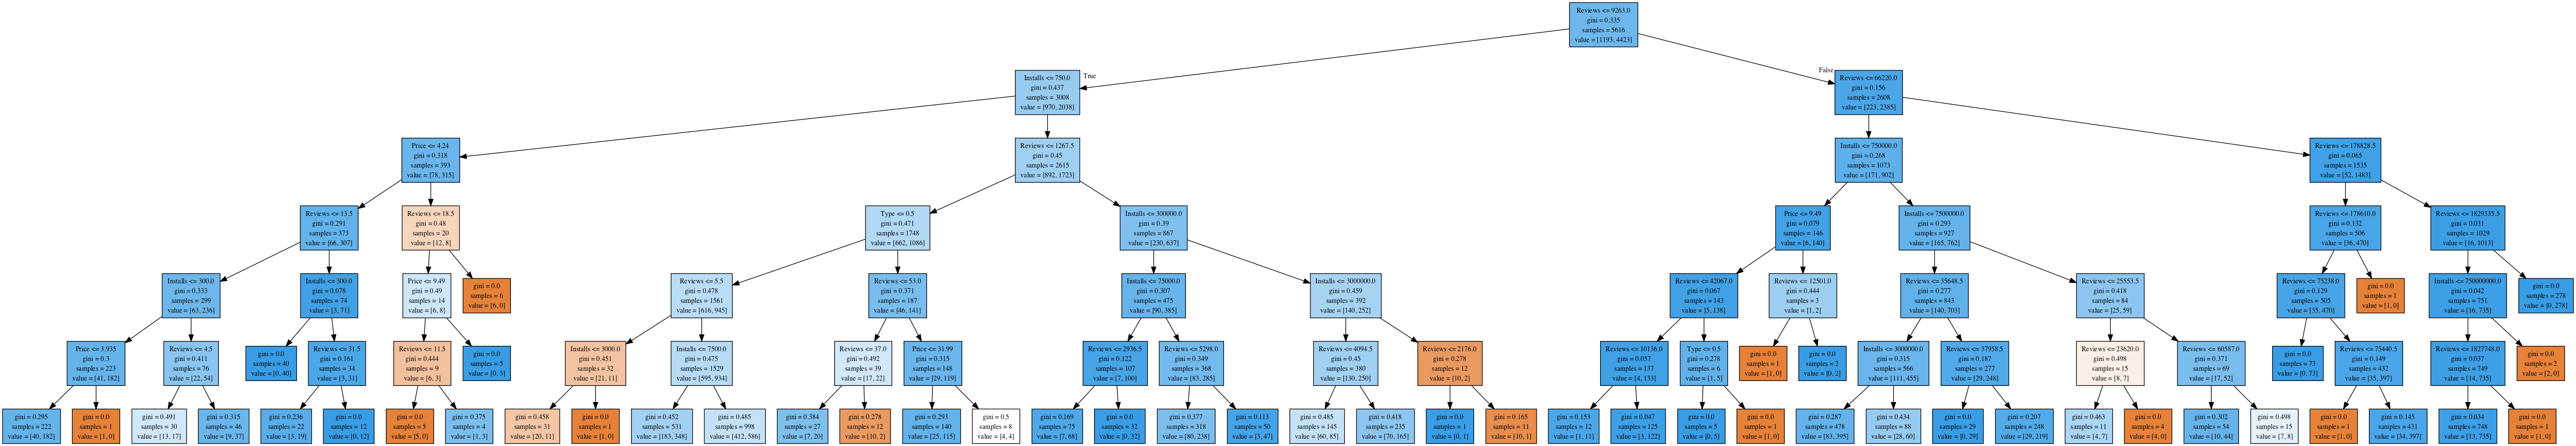

In [19]:
graph = print_tree(clf, features=X.columns)
Image(graph.create_png())

[('Reviews', 0.7593063264221369), ('Type', 0.028163072946033384), ('Price', 0.040718296909482456), ('Installs', 0.17181230372234724)]


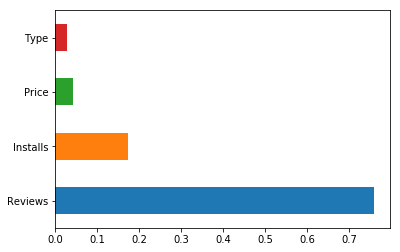

In [20]:
# View a list of the features and their importance scores
print(list(zip(X_train, clf.feature_importances_)))

# plot the important features
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
